<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/3%EC%A3%BC%EC%B0%A8/%EA%B8%B0%EC%83%81%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%9A%A9_%ED%83%9C%EC%96%91%EA%B4%91_%EB%B0%9C%EC%A0%84%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

해당 데이터셋은 기상데이터를 이용하여 태양광 발전량을 예측하기 위한 데이터셋입니다. 날짜, 시간, 날씨 정보로 구성되어있으며, 이를 이용하여 태양광 발전량을 예측 할 수 있습니다.
- Hour - 시간
- Minute - 분
- DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
- DNI - 직달일사량(Direct Normal Irradiance (W/m2))
- WS - 풍속(Wind Speed (m/s))
- RH - 상대습도(Relative Humidity (%))
- T - 기온(Temperature (Degree C))
- Target - 태양광 발전량 (kW)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ml-p1

  0% 0.00/6.74k [00:00<?, ?B/s]
100% 6.74k/6.74k [00:00<00:00, 11.6MB/s]
  0% 0.00/26.1k [00:00<?, ?B/s]
100% 26.1k/26.1k [00:00<00:00, 26.5MB/s]
  0% 0.00/302k [00:00<?, ?B/s]
100% 302k/302k [00:00<00:00, 87.7MB/s]


In [6]:
train=pd.read_csv('data.csv')
test=pd.read_csv('X_test.csv')
sample=pd.read_csv('sample_submission.csv')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     9000 non-null   int64  
 1   Hour    9000 non-null   int64  
 2   Minute  9000 non-null   int64  
 3   DHI     9000 non-null   int64  
 4   DNI     9000 non-null   int64  
 5   WS      9000 non-null   float64
 6   RH      9000 non-null   float64
 7   T       9000 non-null   int64  
 8   TARGET  9000 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 632.9 KB


In [8]:
train.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,102,0,0,0,0,1.4,57.76,0,0.000000
1,99,15,0,222,18,1.3,26.82,13,21.957266
2,31,4,0,0,0,2.6,84.94,-6,0.000000
3,40,18,30,0,0,1.5,89.18,2,0.000000
4,191,1,30,0,0,2.4,84.35,12,0.000000


In [9]:
train.columns

Index(['Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

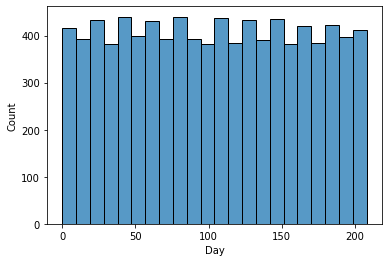

In [18]:
sns.histplot(train,x='Day')

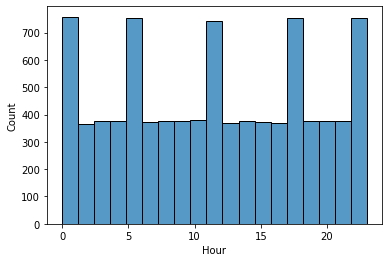

In [11]:
sns.histplot(train,x='Hour')

In [13]:
train['Minute'].value_counts()

0     4505
30    4495
Name: Minute, dtype: int64

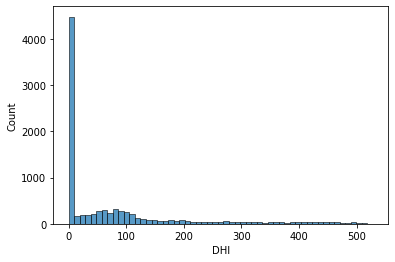

In [14]:
sns.histplot(train,x='DHI')

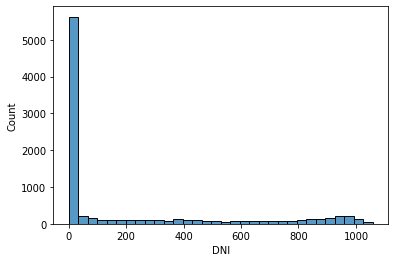

In [15]:
sns.histplot(train,x='DNI')

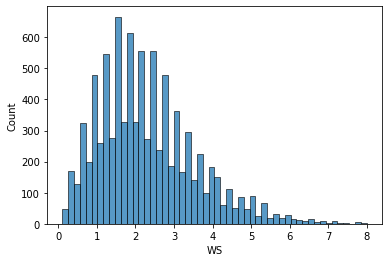

In [16]:
sns.histplot(train,x='WS')

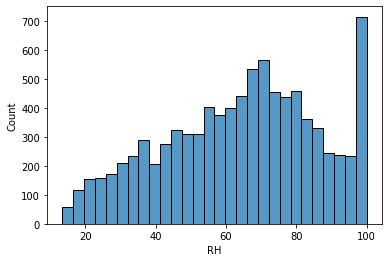

In [19]:
sns.histplot(train,x='RH')

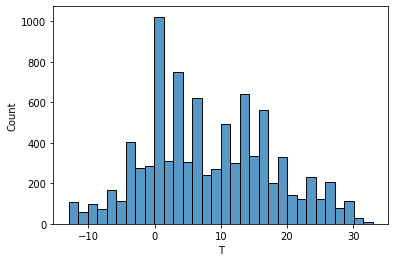

In [20]:
sns.histplot(train,x='T')

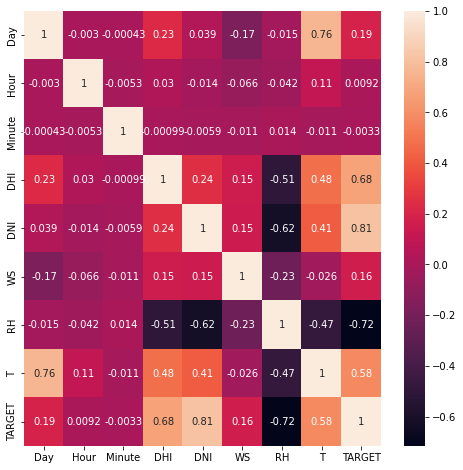

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)

In [26]:
X_train=train.drop('TARGET',axis=1)
y_train=train['TARGET']
X_test=test

In [27]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5개의 교차 검증의 개별 Negative MSE scores :',np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5개의 교차 검증의 개별 Negative MSE scores : [-1.43 -1.03 -0.97 -1.04 -0.95]
5 교차 검증의 개별 RMSE scores: [1.2  1.01 0.98 1.02 0.97]
5 교차 검증의 평균 RMSE :1.038


In [44]:
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [45]:
y_pred=rf.predict(X_test)
sample['TARGET']=y_pred
sample.to_csv('rf.csv',mode='w',header=True,index=False)

In [40]:
col=['Day', 'Hour', 'Minute', 'DHI', 'DNI', 'WS', 'RH', 'T']

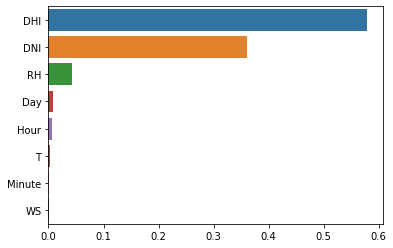

In [41]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data,y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_train,y_train)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=col)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

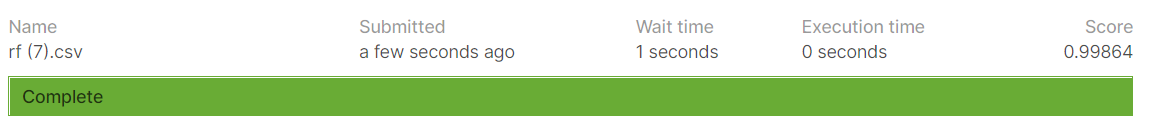